/tmp/ipython-input-2638183659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='magma')


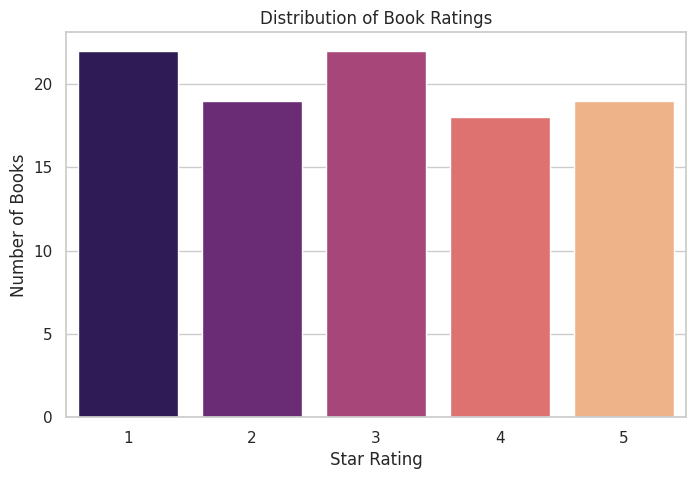

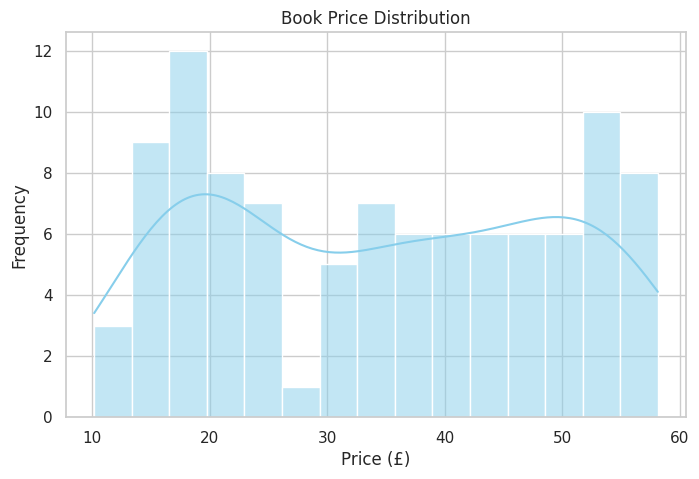

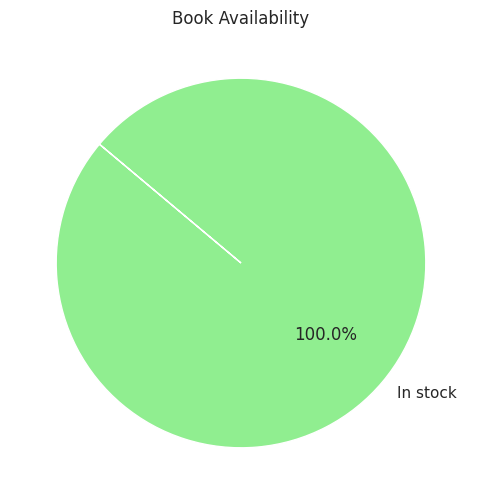

In [19]:
!pip install seaborn
!pip install matplotlib
!pip install pandas


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

df = pd.read_csv('books_data.csv')

rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating'] = df['Rating'].map(rating_map)

df['Price'] = df['Price'].str.replace('Â£', '').astype(float)

plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='magma')
plt.title('Distribution of Book Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Books')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=15, kde=True, color='skyblue')
plt.title('Book Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

availability_counts = df['Availability'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Book Availability')
plt.show()

In [ ]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_book_details(book_url):
    response = requests.get(book_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find('h1').text
    price = soup.find('p', class_='price_color').text
    availability = soup.find('p', class_='instock availability').text.strip()
    rating = soup.find('p', class_='star-rating')['class'][1]

    return [title, price, availability, rating]

books_data = []
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

for page in range(1, 6):
    print(f"Scraping page {page}...")
    response = requests.get(base_url.format(page))
    soup = BeautifulSoup(response.content, 'html.parser')

    book_links = [f"http://books.toscrape.com/catalogue/{a['href']}" for a in soup.select('h3 a')]

    for link in book_links:
        books_data.append(get_book_details(link))
        time.sleep(1)

df = pd.DataFrame(books_data, columns=['Title', 'Price', 'Availability', 'Rating'])
df.to_csv('books_data.csv', index=False)

print("\nScraping complete. Data saved to books_data.csv")
display(df.head())